In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


# File data CSV
filedataC150 = 'ANNACHPTVC150.csv'                        #cut
filedataNC150 = 'ANNACHPTVC150VIDE.csv'                   #nocut
filedataC1200 = 'ANNACHPT1200RPM.csv'                     #cut
filedataNC1200 = 'ANNACHPT1200RPMVIDE.csv'                #nocut

# Reading csv
dfC150 = pd.read_csv(filedataC150, skiprows=10)
dfNC150 = pd.read_csv(filedataNC150, skiprows=10)
dfC1200 = pd.read_csv(filedataC1200, skiprows=10)
dfNC1200 = pd.read_csv(filedataNC1200, skiprows=10)

# # Columns names / Same for all data
dfC150.columns = [
    'time',
    'power',
    'prog_pos_z',
    'prog_pos_x',
    'meas_pos_z',
    'meas_pos_x',
    'spindle1' # only the first data does not have the spindle 2 data
]
dfNC150.columns = [
    'time',
    'power',
    'prog_pos_z',
    'prog_pos_x',
    'meas_pos_z',
    'meas_pos_x',
    'spindle1',
    'spindle2'
]
dfC1200.columns = [
    'time',
    'power',
    'prog_pos_z',
    'prog_pos_x',
    'meas_pos_z',
    'meas_pos_x',
    'spindle1',
    'spindle2'
]
dfNC1200.columns = [
    'time',
    'power',
    'prog_pos_z',
    'prog_pos_x',
    'meas_pos_z',
    'meas_pos_x',
    'spindle1',
    'spindle2'
]

# estrae tutte le colonne fatta eccezione di "time"
cols_to_convert = dfC150.columns.difference(['time'])  # or specify manually

# # Conversion in numeric format 
# for col in df.columns:
for df in [dfC150, dfNC150, dfC1200, dfNC1200]:
    for col in cols_to_convert:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        


In [2]:

# # Elimina le righe che contengono NaN
# # 
dfC150 = dfC150.dropna()
dfNC150 = dfNC150.dropna()
dfC1200 = dfC1200.dropna()
dfNC1200 = dfNC1200.dropna()


In [3]:

# # Calculating  (Do the difference with the element in the previous row)
dfC150['delta_t'] = dfC150['time'].diff()
# For the first row gives a NaN because there isn't a previous row, 
# so we substitute this value with 0
dfC150['delta_t'].iloc[0] = 0  # Premier delta_t = 0

dfNC150['delta_t'] = dfNC150['time'].diff()
dfNC150['delta_t'].iloc[0] = 0  # Premier delta_t = 0

dfC1200['delta_t'] = dfC1200['time'].diff()
dfC1200['delta_t'].iloc[0] = 0  # Premier delta_t = 0

dfNC1200['delta_t'] = dfNC1200['time'].diff()
dfNC1200['delta_t'].iloc[0] = 0  # Premier delta_t = 0


C:\Users\daniele try\AppData\Local\Temp\ipykernel_2944\2617095566.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfC150['delta_t'].iloc[0] = 0  # Premier delta_t = 0
C:\Users\daniele try\AppData\Local\Temp\ipykernel_2944\2617095566.py:8

In [4]:

# ####################################################
# # Calculating Instantaneos energy (W × s / 1000 = kJ)
# # df['energy_kJ'] = df['power'] * df['delta_t'] / 1000

dfC150['energy_kJ'] = dfC150['power'] * dfC150['delta_t'] / 1000
dfNC150['energy_kJ'] = dfNC150['power'] * dfNC150['delta_t'] / 1000
dfC1200['energy_kJ'] = dfC1200['power'] * dfC1200['delta_t'] / 1000
dfNC1200['energy_kJ'] = dfNC1200['power'] * dfNC1200['delta_t'] / 1000


In [5]:


# # Accumulated energy (cumsum does the cumulative sum and by default skips NaN) 
# #df['energy_kJ_cum'] = df['energy_kJ'].cumsum()

dfC150['energy_kJ_cum'] = dfC150['energy_kJ'].cumsum()
dfNC150['energy_kJ_cum'] = dfNC150['energy_kJ'].cumsum()

dfC1200['energy_kJ_cum'] = dfC1200['energy_kJ'].cumsum()
dfNC1200['energy_kJ_cum'] = dfNC1200['energy_kJ'].cumsum()


In [6]:


# Group energy by programmed X position

# Calcola la somma delle energia per la posizione x
# Mantiene solo le righe in cui la somma di energia supera 0.15

energy_by_x_C150 = dfC150.groupby('prog_pos_x')['energy_kJ'].sum().reset_index() 
Filt_energy_by_x_C150 = energy_by_x_C150[energy_by_x_C150['energy_kJ'] > 0.15]

energy_by_x_NC150 = dfNC150.groupby('prog_pos_x')['energy_kJ'].sum().reset_index()
Filt_energy_by_x_NC150 = energy_by_x_NC150[energy_by_x_NC150['energy_kJ'] > 0.15]

energy_by_x_C1200 = dfC1200.groupby('prog_pos_x')['energy_kJ'].sum().reset_index()
Filt_energy_by_x_C1200 = energy_by_x_C1200[energy_by_x_C1200['energy_kJ'] > 0.15]

energy_by_x_NC1200 = dfNC1200.groupby('prog_pos_x')['energy_kJ'].sum().reset_index()
Filt_energy_by_x_NC1200 = energy_by_x_NC1200[energy_by_x_NC1200['energy_kJ'] > 0.15]


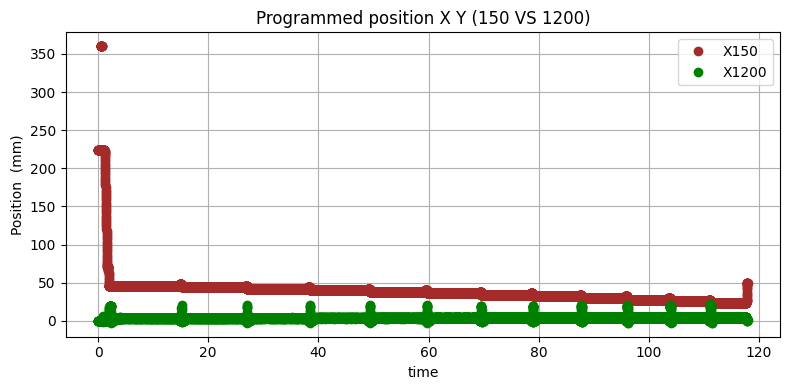

In [23]:
# Just to Understand the trajectory
plt.figure(figsize=(8, 4))
plt.plot(dfC150['time'], dfC150['prog_pos_x'], label='X150', color='brown',marker='o', linestyle='None') #linestyle='-')
#plt.plot(dfC150['time'], (dfC150['prog_pos_z']/20)+45, label='Z150', color='red',marker='o', linestyle='None') #linestyle='-')
plt.plot(dfC150['time'], dfC150['power']/500, label='X1200', color='green',marker='o', linestyle='None') #linestyle='-')
#plt.plot(dfC1200['time'], dfC1200['prog_pos_z'], label='Z1200', color='yellow',marker='o', linestyle='None') #linestyle='-')
plt.xlabel('time')
plt.ylabel('Position  (mm)')
plt.title('Programmed position X Y (150 VS 1200)')
plt.grid(True)
plt.legend()
plt.tight_layout()
#plt.xlim(47.5,60)
#plt.ylim(35,47)
plt.show(block=False)

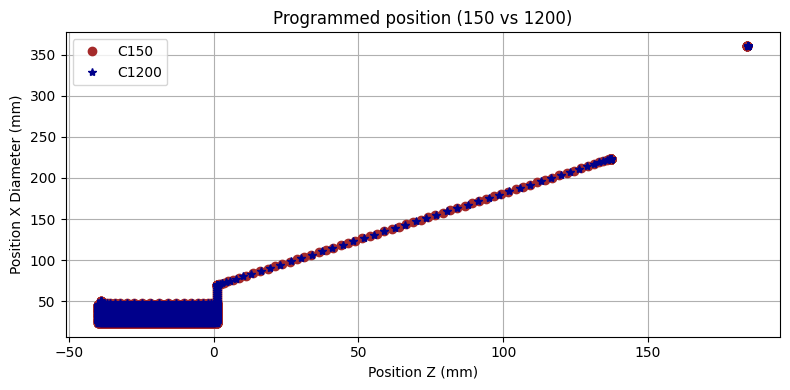

In [8]:
# grafico inutile se capise un cazzo
plt.figure(figsize=(8, 4))
# Plot C150
plt.plot(dfC150['prog_pos_z'], dfC150['prog_pos_x'], label='C150', color='brown',marker='o', linestyle='None') #linestyle='-')
# Plot NC150
plt.plot(dfC1200['prog_pos_z'], dfC1200['prog_pos_x'], label='C1200', color='darkblue',marker='*', linestyle='None') #linestyle='-')
plt.xlabel('Position Z (mm)')
plt.ylabel('Position X Diameter (mm)')
plt.title('Programmed position (150 vs 1200)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show(block=False)


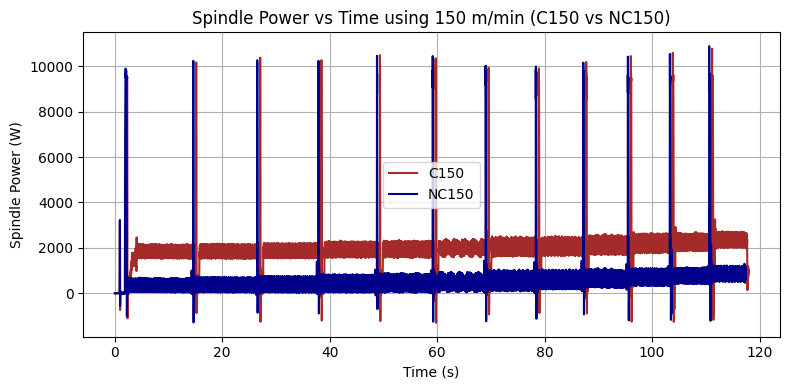

In [9]:
# Power cutting VS no cutting Vc=150 
plt.figure(figsize=(8, 4))
# Plot C150
plt.plot(dfC150['time'], dfC150['power'], label='C150', color='brown') 
# Plot NC150
plt.plot(dfNC150['time'], dfNC150['power'], label='NC150', color='darkblue')
plt.xlabel('Time (s)')
plt.ylabel('Spindle Power (W)')
plt.title('Spindle Power vs Time using 150 m/min (C150 vs NC150)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show(block=False)


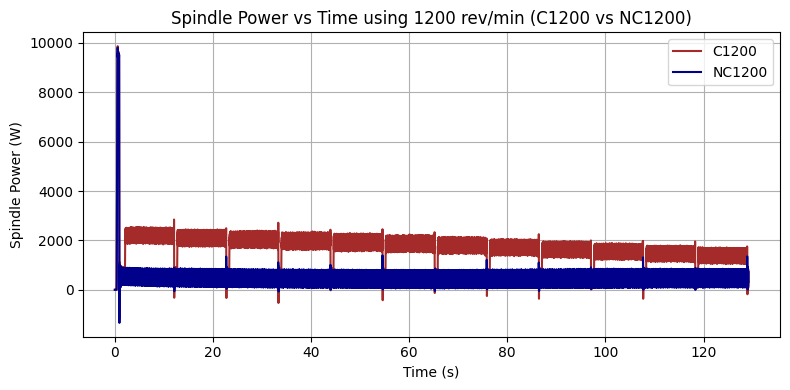

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(dfC1200['time'], dfC1200['power'], label='C1200', color='brown')
plt.plot(dfNC1200['time'], dfNC1200['power'], label='NC1200', color='darkblue')
plt.xlabel('Time (s)')
plt.ylabel('Spindle Power (W)')
plt.title('Spindle Power vs Time using 1200 rev/min (C1200 vs NC1200)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show(block=False)

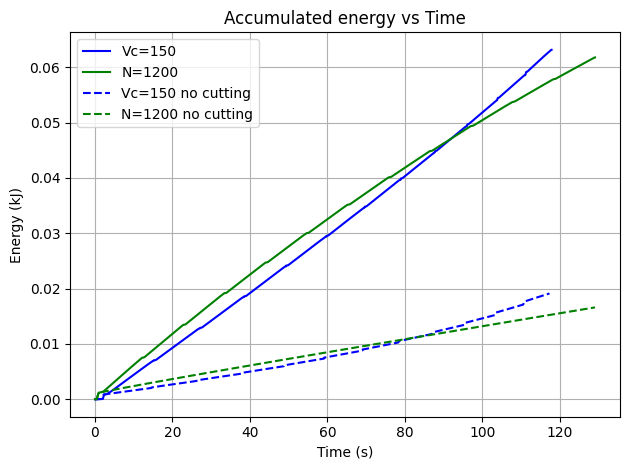

In [11]:
# Accumulated energy vs Time kJ
plt.plot(dfC150['time'], dfC150['energy_kJ_cum'] / 3600, label='Vc=150',color='blue', linestyle='-')
plt.plot(dfC1200['time'], dfC1200['energy_kJ_cum'] / 3600, label='N=1200',color='green', linestyle='-')
plt.plot(dfNC150['time'], dfNC150['energy_kJ_cum'] / 3600, label='Vc=150 no cutting',color='blue', linestyle='--')
plt.plot(dfNC1200['time'], dfNC1200['energy_kJ_cum'] / 3600, label='N=1200 no cutting',color='green', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Energy (kJ)')
plt.title('Accumulated energy vs Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show(block=False)


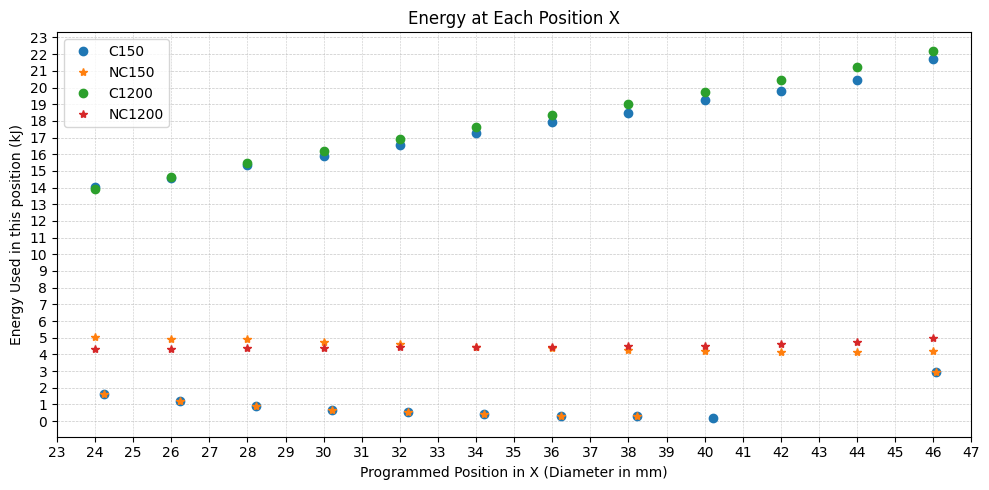

In [12]:
# Energy consumption versus for each position

plt.figure(figsize=(10, 5))
plt.plot(Filt_energy_by_x_C150['prog_pos_x'], Filt_energy_by_x_C150['energy_kJ'],linestyle='None', marker='o', label='C150')
plt.plot(Filt_energy_by_x_NC150['prog_pos_x'], Filt_energy_by_x_NC150['energy_kJ'],linestyle='None', marker='*', label='NC150')
plt.plot(Filt_energy_by_x_C1200['prog_pos_x'], Filt_energy_by_x_C1200['energy_kJ'],linestyle='None', marker='o', label='C1200')
plt.plot(Filt_energy_by_x_NC1200['prog_pos_x'], Filt_energy_by_x_NC1200['energy_kJ'],linestyle='None', marker='*', label='NC1200')
plt.xlabel('Programmed Position in X (Diameter in mm)')
plt.ylabel('Energy Used in this position (kJ)')
plt.title('Energy at Each Position X')
plt.xlim(23, 47)
# Set Y-axis grid every 1 unit
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
# Add grid
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.grid(True, which='major', axis='x', linestyle='--', linewidth=0.4, alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show(block=False)


Interval 1: 6s to 11s, Mean Power Cutting = 1852.95 W
Interval 1: 6s to 11s, Mean Power No Cutting = 346.77 W
Interval 2: 18s to 23s, Mean Power Cutting = 1843.13 W
Interval 2: 18s to 23s, Mean Power No Cutting = 359.31 W
Interval 3: 30s to 35s, Mean Power Cutting = 1868.33 W
Interval 3: 30s to 35s, Mean Power No Cutting = 375.95 W
Interval 4: 41s to 46s, Mean Power Cutting = 1909.13 W
Interval 4: 41s to 46s, Mean Power No Cutting = 398.43 W
Interval 5: 51s to 56s, Mean Power Cutting = 1927.70 W
Interval 5: 51s to 56s, Mean Power No Cutting = 428.77 W
Interval 6: 61s to 66s, Mean Power Cutting = 1972.61 W
Interval 6: 61s to 66s, Mean Power No Cutting = 460.22 W
Interval 7: 71s to 76s, Mean Power Cutting = 2011.84 W
Interval 7: 71s to 76s, Mean Power No Cutting = 494.37 W
Interval 8: 80s to 85s, Mean Power Cutting = 2043.59 W
Interval 8: 80s to 85s, Mean Power No Cutting = 544.78 W
Interval 9: 89s to 94s, Mean Power Cutting = 2089.75 W
Interval 9: 89s to 94s, Mean Power No Cutting = 592

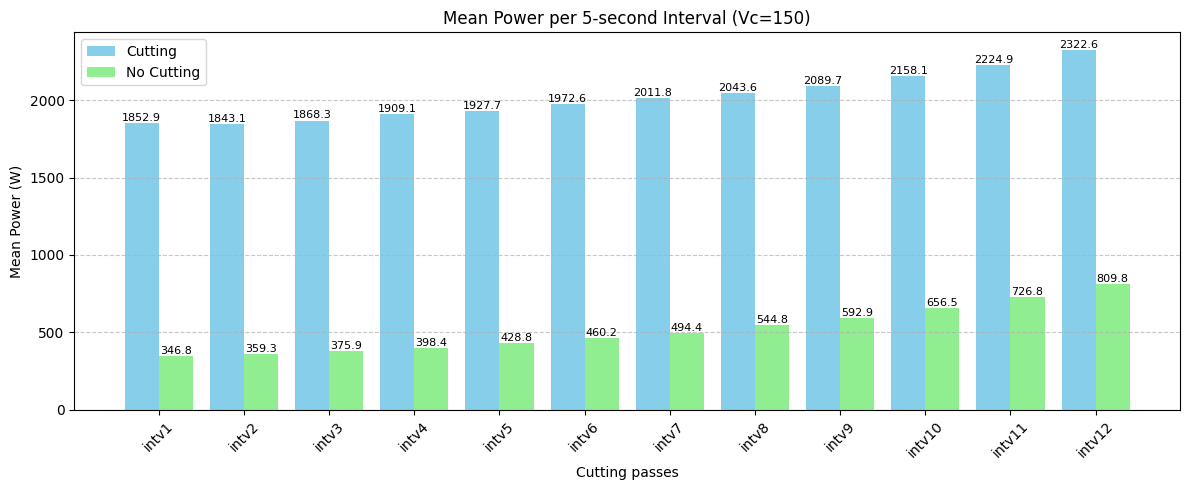

In [13]:

# Intervalles
interval_starts150 = [6, 18, 30, 41, 51, 61, 71, 80, 89, 97, 105, 112]
interval_dfsC150 = {}
interval_dfsNC150 = {}
mean_powersC150 = {}
mean_powersNC150 = {}

for i, start_time in enumerate(interval_starts150, start=1):
    end_time = start_time + 5
    maskC = (dfC150['time'] >= start_time) & (dfC150['time'] <= end_time)
    interval_dfC150 = dfC150[maskC]

    maskNC = (dfNC150['time'] >= start_time) & (dfNC150['time'] <= end_time)
    interval_dfNC150 = dfNC150[maskNC]

    interval_dfsC150[f'intv{i}'] = interval_dfC150
    interval_dfsNC150[f'intv{i}'] = interval_dfNC150

    mean_powerC150 = interval_dfC150['power'].mean()
    mean_powerNC150 = interval_dfNC150['power'].mean()

    mean_powersC150[f'intv{i}'] = mean_powerC150  
    mean_powersNC150[f'intv{i}'] = mean_powerNC150

    print(f'Interval {i}: {start_time}s to {end_time}s, Mean Power Cutting = {mean_powerC150:.2f} W')
    print(f'Interval {i}: {start_time}s to {end_time}s, Mean Power No Cutting = {mean_powerNC150:.2f} W')

# Création des listes
labels = list(mean_powersC150.keys())
mean_values_C = list(mean_powersC150.values())
mean_values_NC = list(mean_powersNC150.values())

# Largeur des barres
bar_width = 0.4
x = np.arange(len(labels))  # positions x

# Tracer les barres
plt.figure(figsize=(12, 5))
bars_C = plt.bar(x - bar_width/2, mean_values_C, width=bar_width, color='skyblue', label='Cutting')
bars_NC = plt.bar(x + bar_width/2, mean_values_NC, width=bar_width, color='lightgreen', label='No Cutting')

plt.xlabel('Cutting passes')
plt.ylabel('Mean Power (W)')
plt.title('Mean Power per 5-second Interval (Vc=150)')
plt.xticks(x, labels, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Afficher les valeurs au-dessus des barres
for bar in bars_C:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}', ha='center', va='bottom', fontsize=8)
for bar in bars_NC:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show(block=False)


Interval 1: 5s to 10s, Mean Power Cutting = 2211.84 W
Interval 1: 5s to 10s, Mean Power No Cutting = 470.52 W
Interval 2: 14s to 19s, Mean Power Cutting = 2112.66 W
Interval 2: 14s to 19s, Mean Power No Cutting = 452.89 W
Interval 3: 24s to 29s, Mean Power Cutting = 2036.71 W
Interval 3: 24s to 29s, Mean Power No Cutting = 442.16 W
Interval 4: 33s to 38s, Mean Power Cutting = 1777.78 W
Interval 4: 33s to 38s, Mean Power No Cutting = 437.53 W
Interval 5: 46s to 51s, Mean Power Cutting = 1892.44 W
Interval 5: 46s to 51s, Mean Power No Cutting = 429.65 W
Interval 6: 56s to 61s, Mean Power Cutting = 1827.28 W
Interval 6: 56s to 61s, Mean Power No Cutting = 427.21 W
Interval 7: 67s to 72s, Mean Power Cutting = 1755.25 W
Interval 7: 67s to 72s, Mean Power No Cutting = 424.97 W
Interval 8: 78s to 83s, Mean Power Cutting = 1681.19 W
Interval 8: 78s to 83s, Mean Power No Cutting = 422.50 W
Interval 9: 88s to 93s, Mean Power Cutting = 1608.05 W
Interval 9: 88s to 93s, Mean Power No Cutting = 421

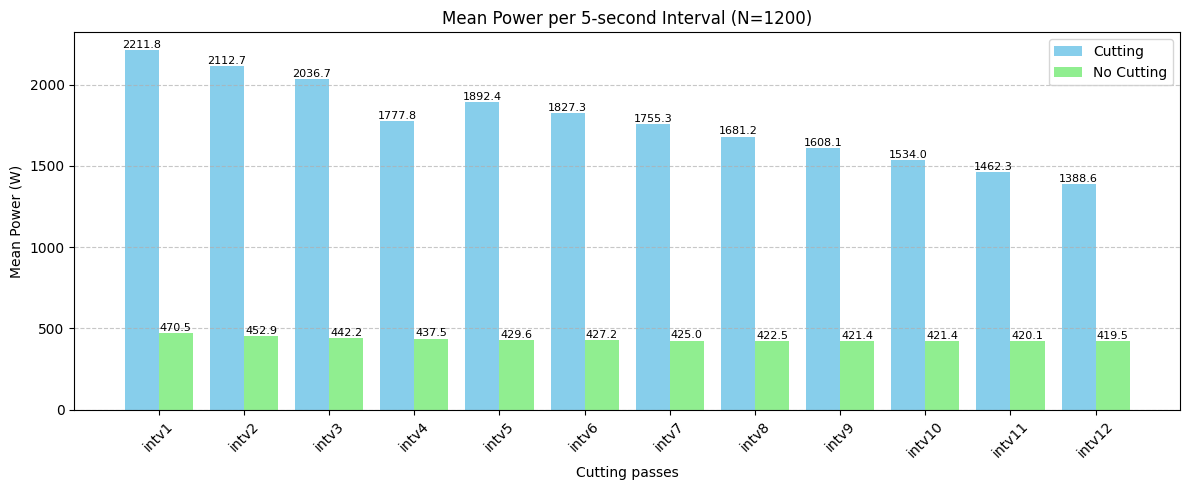

In [14]:
interval_starts1200 = [5, 14, 24, 33, 46, 56, 67, 78, 88, 98, 110, 120]

interval_dfsC1200 = {}
interval_dfsNC1200 = {}
mean_powersC1200 = {}
mean_powersNC1200 = {}

for i, start_time in enumerate(interval_starts1200, start=1):
    end_time = start_time + 5
    maskC = (dfC1200['time'] >= start_time) & (dfC1200['time'] <= end_time)
    interval_dfC1200 = dfC1200[maskC]

    maskNC = (dfNC1200['time'] >= start_time) & (dfNC1200['time'] <= end_time)
    interval_dfNC1200 = dfNC1200[maskNC]

    interval_dfsC1200[f'intv{i}'] = interval_dfC1200
    interval_dfsNC1200[f'intv{i}'] = interval_dfNC1200

    mean_powerC1200 = interval_dfC1200['power'].mean()
    mean_powerNC1200 = interval_dfNC1200['power'].mean()

    mean_powersC1200[f'intv{i}'] = mean_powerC1200
    mean_powersNC1200[f'intv{i}'] = mean_powerNC1200

    print(f'Interval {i}: {start_time}s to {end_time}s, Mean Power Cutting = {mean_powerC1200:.2f} W')
    print(f'Interval {i}: {start_time}s to {end_time}s, Mean Power No Cutting = {mean_powerNC1200:.2f} W')

# Plotting
labels = list(mean_powersC1200.keys())
mean_values_C = list(mean_powersC1200.values())
mean_values_NC = list(mean_powersNC1200.values())

bar_width = 0.4
x = np.arange(len(labels))

plt.figure(figsize=(12, 5))
bars_C = plt.bar(x - bar_width/2, mean_values_C, width=bar_width, color='skyblue', label='Cutting')
bars_NC = plt.bar(x + bar_width/2, mean_values_NC, width=bar_width, color='lightgreen', label='No Cutting')

plt.xlabel('Cutting passes')
plt.ylabel('Mean Power (W)')
plt.title('Mean Power per 5-second Interval (N=1200)')
plt.xticks(x, labels, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Add values on top
for bar in bars_C:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}', ha='center', va='bottom', fontsize=8)
for bar in bars_NC:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [15]:

# Build the table
mean_power_table = pd.DataFrame({
    'Interval': list(mean_powersC150.keys()),
    'Vc=150 Cutting': list(mean_powersC150.values()),
    'Vc=150 No Cutting': list(mean_powersNC150.values()),
    'Vc=1200 Cutting': list(mean_powersC1200.values()),
    'Vc=1200 No Cutting': list(mean_powersNC1200.values())
})

# Optional: Set Interval as index
mean_power_table.set_index('Interval', inplace=True)

# Show table in console
print(mean_power_table)

# Export to CSV
mean_power_table.to_csv('mean_powers_summary.csv')




          Vc=150 Cutting  Vc=150 No Cutting  Vc=1200 Cutting  \
Interval                                                       
intv1        1852.948312         346.769776      2211.844048   
intv2        1843.127737         359.313246      2112.658053   
intv3        1868.325654         375.945573      2036.707431   
intv4        1909.130716         398.432173      1777.778253   
intv5        1927.700861         428.765225      1892.439418   
intv6        1972.610478         460.223741      1827.281338   
intv7        2011.838321         494.368846      1755.250834   
intv8        2043.587279         544.778712      1681.188085   
intv9        2089.749428         592.883193      1608.051121   
intv10       2158.094097         656.526330      1534.042831   
intv11       2224.932097         726.777025      1462.301526   
intv12       2322.556965         809.752717      1388.596335   

          Vc=1200 No Cutting  
Interval                      
intv1             470.516284  
intv2     